In [1]:
#import datasets
from keras.datasets import mnist

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

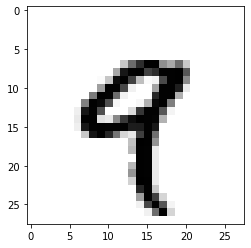

In [2]:
#want to see the data set
import matplotlib.pyplot as plt
digit = train_images[4]

plt.imshow(digit, cmap = plt.cm.binary)
plt.show()


Here, our data consists of images of numbers 0 - 9, and we want to train our model how to classify these images.

In [3]:
#analysing the data
train_images.shape, len(train_labels)

#60,000 numbers/letters and labels correspoinging to the images

((60000, 28, 28), 60000)

In [4]:
train_labels

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [5]:
#loooking at the test data
test_images.shape, len(test_labels)

#10,000 test images to test the algorithm

((10000, 28, 28), 10000)

Process:

-   Feed the network the training data/training labels

-   Network runs and learns
    
-   Verify the running of the algorithm using the test data

In [6]:
#constructing the model

from keras import models
from keras import layers

#using sequential model
network = models.Sequential()

#input shape takes in a 28x28 array, as the training set consists of 60,000 x 28x28 arrays
network.add(layers.Dense(512, activation = 'relu', input_shape = (28 * 28,)))

#add in another layer
network.add(layers.Dense(10, activation = 'softmax'))

-  layers extract represntations out of data fed to them like a sieve
-  deep learning consists of layers that will implement a form of data distillation, simplifying data further and further into refined features

Above, our model consists of 2 dense layers. Dense layers refer to layers that are fully connected, as our data goes in and connects to all of the neurons in the layer. Here, the first layer consists of 512 neurons, the second has 10 neurons. Data gets touched by every single neuron, thus the phrase 'fully connected.'

The second layer is a bit different, as instead of a relu layer, it is a softmax, which takes data from previous layer and returns an array of 10 probability scores from each of its 10 neurons. We use 10 neurons in this softmax layer as the image data consists of numbers from 0-9, thus 10 labels that we want to classify.

<div>
<img src="Photos/MachineLearningDiagram.jpg" width="500"/>
</div>






-   Loss Function: how the network will measure its performance on the training data, and the feedback it gives itself in order to change its weights in a more optimized direction
-   Optimizer: How the network will change the weights of the layers from the data and the loss Function
-   Metrics to Monitor Training/Testing: Keras gives the option of letting the user see real time metrics like accuracy, etc..





In [7]:
#compile the network with the deired optimizer, loss function, and we wonly want the accuracy
network.compile(optimizer = "rmsprop", loss = "categorical_crossentropy", metrics = ["accuracy"])

In [8]:
#reshape the test data so that the data fits the input shape (60000 x 28 * 28)

train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255

test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype("float32") / 255

In [9]:
#categorically encode the labels, explanined in later notebooks
from tensorflow.keras.utils import to_categorical

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [10]:
#RUN THE MODELELELELELEL
#network.fit (datain, labels, rounds of learning tha tthe model goes through/iterations, number of training examples in 1 epoch)
network.fit(train_images, train_labels, epochs = 5, batch_size = 128)

Epoch 1/5
469/469 [==============================] - 41s 12ms/step - loss: 0.4229 - accuracy: 0.87780s - loss: 0.4240 - accuracy: 0.87
Epoch 2/5
469/469 [==============================] - 6s 13ms/step - loss: 0.1112 - accuracy: 0.9665
Epoch 3/5
469/469 [==============================] - 6s 12ms/step - loss: 0.0688 - accuracy: 0.9786
Epoch 4/5
469/469 [==============================] - 6s 14ms/step - loss: 0.0481 - accuracy: 0.9858
Epoch 5/5
469/469 [==============================] - 6s 13ms/step - loss: 0.0366 - accuracy: 0.9893


In [12]:
#check progess/efficiency
test_loss, test_acc = network.evaluate(test_images, test_labels)
print('testAccuracy', test_acc)

313/313 [==============================] - 2s 5ms/step - loss: 0.0628 - accuracy: 0.9802
testAccuracy 0.9801999926567078


--------------------------------------

TypeError: Invalid shape (784,) for image data

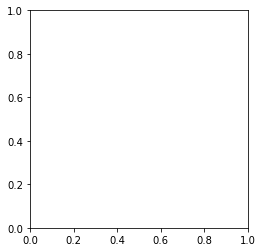

In [13]:
xpred = test_images
digit = xpred[0]

plt.imshow(digit, cmap = plt.cm.binary)
plt.show()